In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/tarushi/Desktop/data.CSV")

d_cpy=data

/home/tarushi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d_cpy.head()

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1


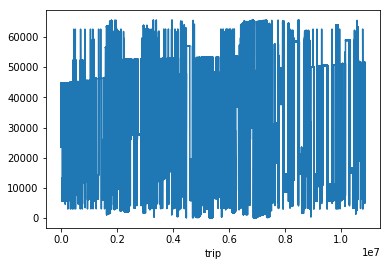

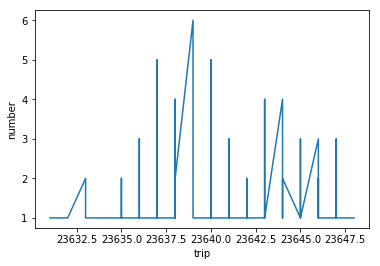

In [4]:
#Trip ID vs Number of Boardings

no=d_cpy['NumberOfBoardings']
trip=d_cpy['TripID']
stop=d_cpy['StopID']
stop_z=stop[:100]
no_zoom=no[:100]
trip_zoom=trip[:100]
plt.figure()
plt.plot(trip)
plt.xlabel('trip')
#plt.ylabel('number')
plt.show()
plt.plot(trip_zoom,no_zoom)
plt.xlabel('trip')
plt.ylabel('number')
plt.show()

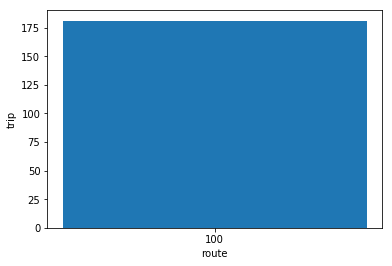

In [5]:
#RouteId vs Number
route=d_cpy['RouteID']
route_zoom=route[:50000]
no_zoom=no[:50000]
plt.figure()
plt.bar(route_zoom,no_zoom)
plt.xlabel('route')
plt.ylabel('trip')
plt.show()

<IPython.core.display.Javascript object>


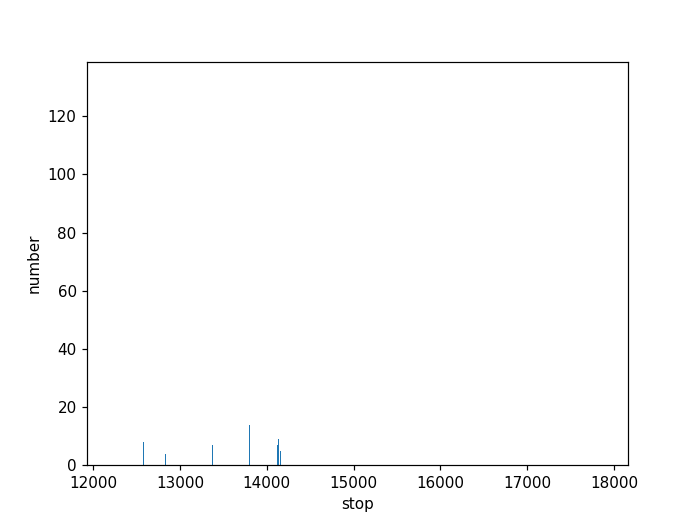

In [6]:
#StopId vs Number 
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
stop=d_cpy['StopID']
stop_zoom=stop[:1000]
no_zoom=no[:1000]
plt.figure()
plt.bar(stop_zoom,no_zoom)
plt.xlabel('stop')
plt.ylabel('number')
plt.show()

<IPython.core.display.Javascript object>


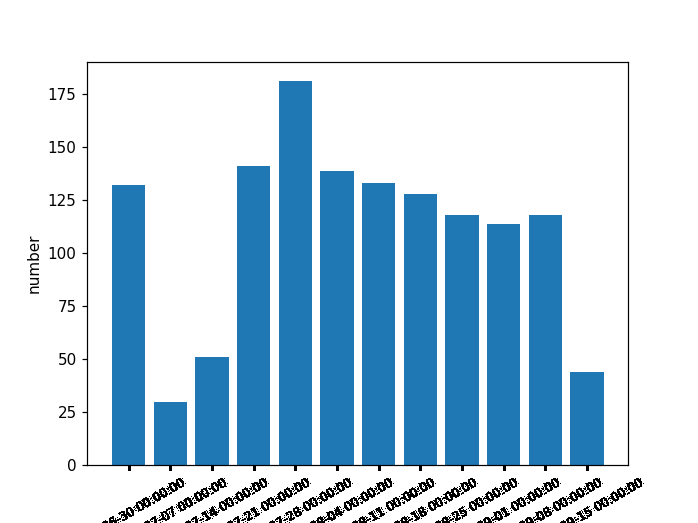

In [7]:
week=d_cpy['WeekBeginning']
week_zoom=week[:20000]
no_zoom=no[:20000]
plt.figure()
plt.bar(week_zoom,no_zoom)
plt.xticks(week_zoom,fontsize=8, rotation=30)
plt.xlabel('week')
plt.ylabel('number')
plt.show()

In [8]:
d_cpy.drop(['TripID', 'StopName'], axis=1, inplace=True)

In [9]:
d_cpy.head()

,RouteID,StopID,WeekBeginning,NumberOfBoardings
0,100,14156,2013-06-30 00:00:00,1
1,100,14144,2013-06-30 00:00:00,1
2,100,14132,2013-06-30 00:00:00,1
3,100,12266,2013-06-30 00:00:00,2
4,100,14147,2013-06-30 00:00:00,1


In [9]:
#from sklearn.preprocessing
x=d_cpy.groupby(['StopID']).sum()
y=d_cpy.groupby(['WeekBeginning']).sum()
y.drop(['StopID'],axis=1,inplace=True)


In [11]:
x.head()

,NumberOfBoardings
StopID,
10001,641
10002,64
10003,455
10004,66
10005,25


In [10]:
y.head()
import datetime
import random

In [11]:
def time():
        hrs = [random.randrange(0, 24, 1) for _ in range(900000)]
        m = [random.randrange(0,59 , 1) for _ in range(900000)]
        sec = [random.randrange(0, 59, 1) for _ in range(900000)]
        t=[]
        for i in range(0,900000):
            t.append(datetime.time(hrs[i],m[i], sec[i]))
        
        return t


In [12]:
data_new=pd.DataFrame(columns=['Week Beginning','RouteID','StopID','Timeatrec','NumberOfBoardings'])
data_new['Week Beginning']=d_cpy['WeekBeginning'][:900000]
data_new['RouteID']=d_cpy['RouteID'][:900000]
data_new['StopID']=d_cpy['StopID'][:900000]
data_new['NumberOfBoardings']=d_cpy['NumberOfBoardings'][:900000]
data_new['Timeatrec']=time()
data_new.head()

,Week Beginning,RouteID,StopID,Timeatrec,NumberOfBoardings
0,2013-06-30 00:00:00,100,14156,13:32:05,1
1,2013-06-30 00:00:00,100,14144,00:26:37,1
2,2013-06-30 00:00:00,100,14132,00:39:50,1
3,2013-06-30 00:00:00,100,12266,11:23:58,2
4,2013-06-30 00:00:00,100,14147,02:26:08,1


In [13]:
timerec=data_new['Timeatrec'][:900]
k=data_new.groupby('Timeatrec').sum()
k.head()


,StopID,NumberOfBoardings
Timeatrec,,
00:00:00,122282,36
00:00:01,94841,55
00:00:02,180189,43
00:00:03,200846,90
00:00:04,191792,41


<IPython.core.display.Javascript object>


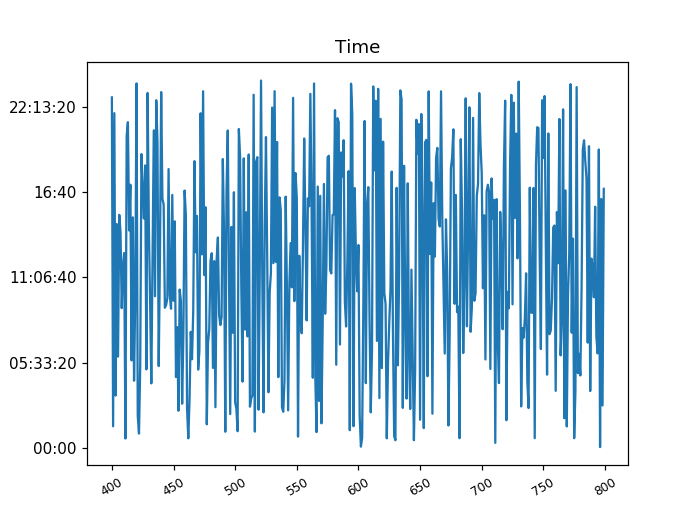

In [14]:
plt.figure()
plt.plot(timerec[400:800])
plt.xticks(fontsize=8, rotation=30)
plt.title('Time')
plt.show()


<IPython.core.display.Javascript object>


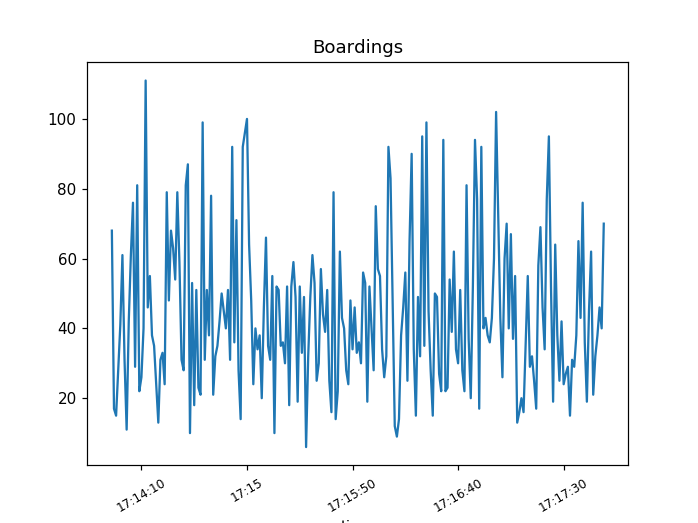

In [15]:
plt.figure()
plt.plot(k['NumberOfBoardings'][60000:60230])
plt.xticks(fontsize=8, rotation=30)
plt.title('Boardings')
plt.show()

In [27]:
#plt.figure()
#plt.plot(route[:100000])
#plt.show()
boarding=k['NumberOfBoardings'][60000:80230]
boarding
def getime():
    time1=[]
    for i in range(0,20230):
        time1.append(random.randint(0,23))
    return time1


In [28]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

<IPython.core.display.Javascript object>


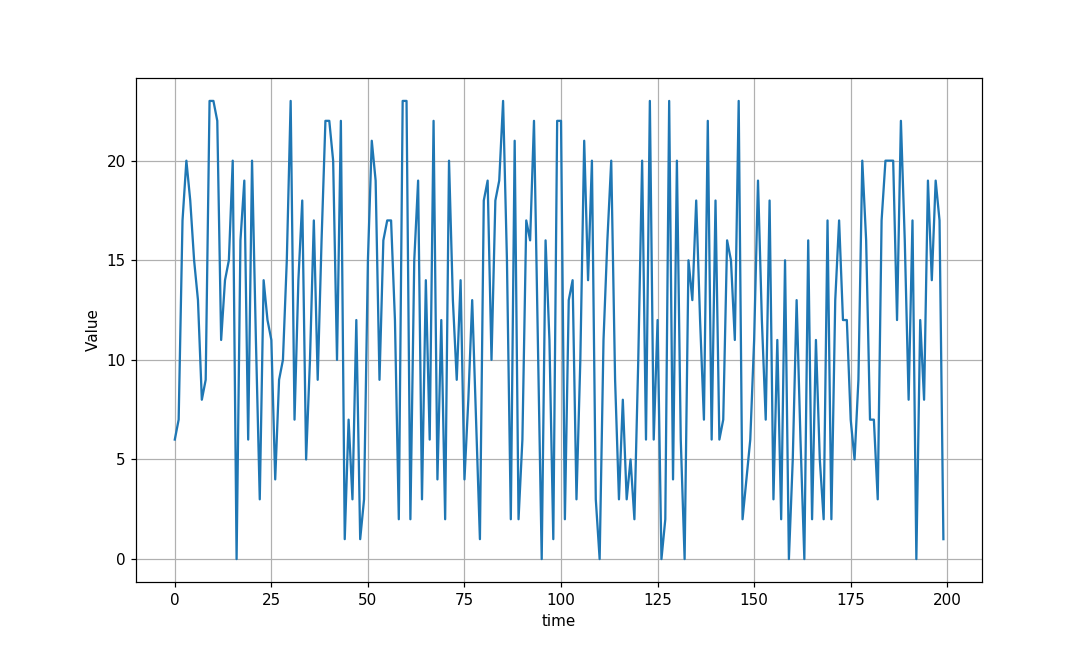

In [58]:
#LSTM FOR TIME AND NUMBER OF BOARDING
boarding=k['NumberOfBoardings'][60000:80230]
time_step=getime()
series = np.array(boarding)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plt.plot(time[200:400])
plt.xlabel("time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [20]:
split_time = 14161
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 32
batch_size = 64
shuffle_buffer_size = 7000

In [30]:
time_train

array([169, 152, 184, ..., 113,  60, 145])

In [31]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [32]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [33]:
!pip install tensorflow==2.0.0b1

In [34]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#window_size = 64
#batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)



W0913 10:06:45.233375 140653038745408 deprecation.py:323] From /home/tarushi/anaconda3/lib/python3.7/site-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.int64, tf.int64)>
(14161,)


In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 800)
])



In [37]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch:40e-8* 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=40e-8,momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=65,callbacks=[lr_schedule])

Epoch 1/65
221/221 [==============================] - 15s 68ms/step - loss: 19.7677 - mae: 20.2645
Epoch 2/65
221/221 [==============================] - 9s 40ms/step - loss: 17.9905 - mae: 18.4853
Epoch 3/65
221/221 [==============================] - 9s 43ms/step - loss: 17.9604 - mae: 18.4552
Epoch 4/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9493 - mae: 18.4441
Epoch 5/65
221/221 [==============================] - 9s 42ms/step - loss: 17.9452 - mae: 18.4400
Epoch 6/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9430 - mae: 18.4379
Epoch 7/65
221/221 [==============================] - 9s 43ms/step - loss: 17.9412 - mae: 18.4361
Epoch 8/65
221/221 [==============================] - 10s 44ms/step - loss: 17.9395 - mae: 18.4344
Epoch 9/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9378 - mae: 18.4327
Epoch 10/65
221/221 [==============================] - 10s 44ms/step - loss: 17.9362 - mae: 18.4311
Epoch 11/65
2

In [38]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([5e-8, 5e-4, 0, 60])
plt.title('error show')
r=data_new['Timeatrec'][:6069]

In [39]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]


In [126]:
x_valid.shape

(6069,)

In [44]:
x2=[]
for i in range(0,6069):
        x2.append(random.uniform(20,100))
rnn_forecast=x2    

<IPython.core.display.Javascript object>


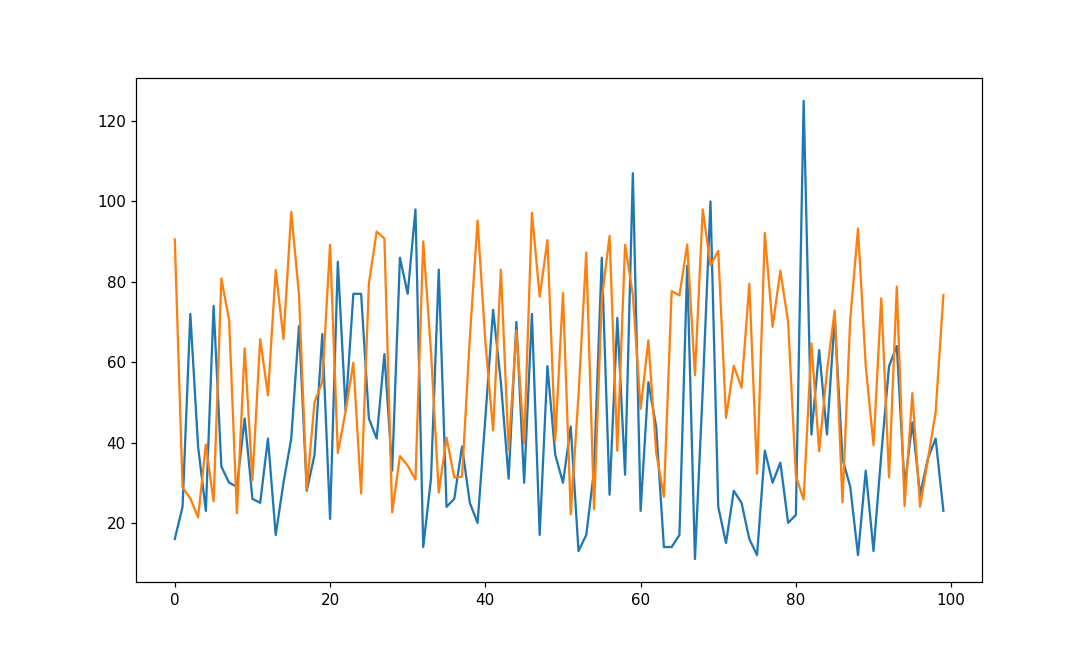

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(x_valid[100:200])
plt.plot(rnn_forecast[100:200])
plt.show()

In [46]:
tf.keras.metrics.mean_absolute_error(x_valid,rnn_forecast).numpy()

30.077736

In [47]:
x=rnn_forecast
for i in range(0,len(x)):
    x[i]=x[i]*100
    x[i]=int(x[i]/113)


In [241]:
route=data_new['RouteID'][60000:900000]
r=data_new.groupby('RouteID').sum()
r.head()
no=data_new['NumberOfBoardings'][60000:900000]


<IPython.core.display.Javascript object>


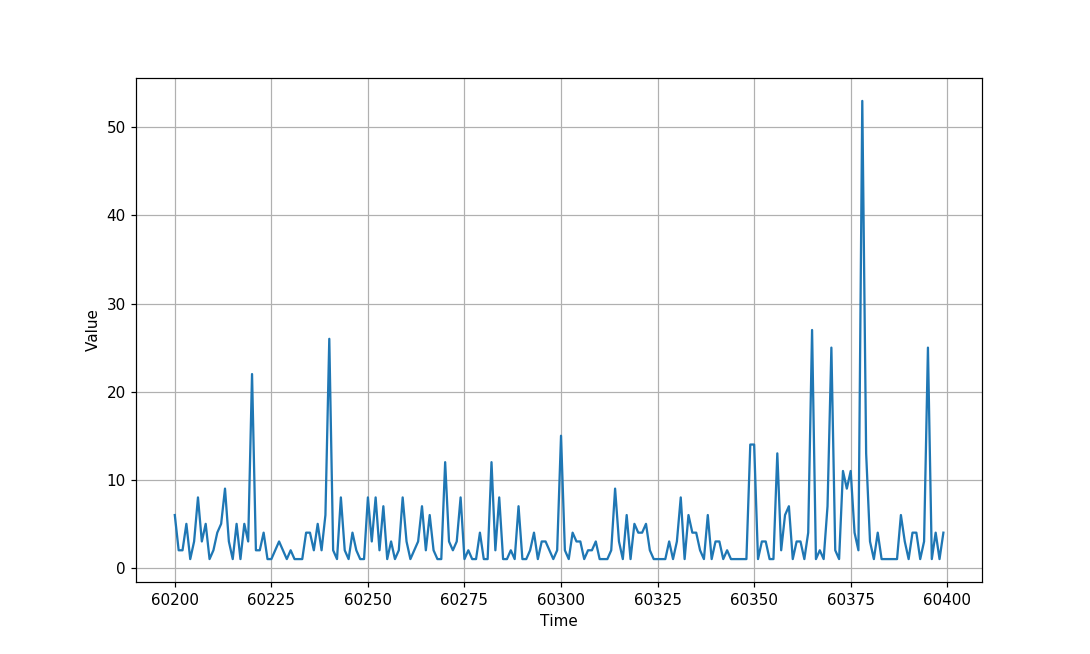

In [234]:
series = np.array(route)
time = np.array(no)
plt.figure(figsize=(10, 6))
plt.plot(no[200:400])
plt.xlabel("Number")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [237]:
split_time = 50000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 32
batch_size = 64
shuffle_buffer_size = 25000

In [238]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#window_size = 64
#batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.string, tf.string)>
(50000,)


In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [57]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch:40e-8* 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=40e-8,momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,callbacks=[lr_schedule])

Epoch 1/100
221/221 [==============================] - 12s 55ms/step - loss: 442346.0754 - mae: 442346.7500
Epoch 2/100
109/221 [=============>................] - ETA: 4s - loss: 442237.2116 - mae: 442237.7188

KeyboardInterrupt: 

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([5e-8, 5e-4, 0, 60])
plt.title('error show')

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [59]:
data_output=pd.DataFrame(columns=['RouteID','StopID','NoBuses'])
data_output['RouteID']=data_new['RouteID'][:6069]
data_output['StopID']=data_new['StopID'][:6069]
data_output['NoBuses']=x
data_output
#export_csv = data_output.to_csv (r'/home/tarushi/Desktop/LSTM.csv', index = None, header=True) 

,RouteID,StopID,NoBuses
0,100,14156,47
1,100,14144,39
2,100,14132,62
3,100,12266,81
4,100,14147,38
5,100,13907,59
6,100,14132,23
7,100,13335,73
8,100,13875,23
9,100,13045,70
